In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [12]:
ann_rh = np.load("new_mean_npys/ANN_rh.npy")
base_ann_rh = np.load("mean_rh_npys/ANN_rh.npy")

In [28]:
single_rh = ann_rh[0].mean(axis=2)
conv_rh = ann_rh[1].mean(axis=2)
spcam_rh = base_ann_rh[0].mean(axis=2)
nncam_rh = base_ann_rh[1].mean(axis=2)
nncam_cd_rh = base_ann_rh[2].mean(axis=2)
cam5_rh = base_ann_rh[3].mean(axis=2)


In [6]:
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)
levs = np.array([
    3.64346569,   7.59481965,  14.35663225,  24.61222,     38.26829977,
      54.59547974,  72.01245055,  87.82123029, 103.31712663, 121.54724076,
       142.99403876, 168.22507977, 197.9080867,  232.82861896, 273.91081676,
        322.24190235, 379.10090387, 445.9925741,  524.68717471, 609.77869481,
         691.38943031, 763.40448111, 820.85836865, 859.53476653, 887.02024892,
          912.64454694, 936.19839847, 957.48547954, 976.32540739, 992.55609512]).astype(int)

In [8]:
single_rh.shape

(30, 96)

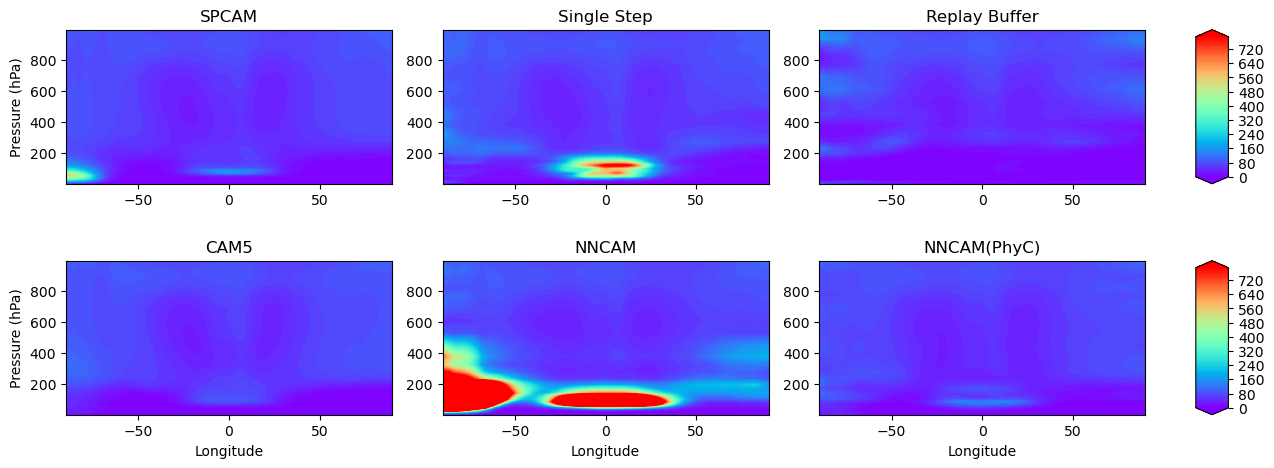

In [35]:
fig, axes = plt.subplots(2,4, figsize=(15,5),width_ratios=[1,1,1,0.1])
# increase hspace
plt.subplots_adjust(hspace=0.5)
axes[0,0].contourf(lat, levs, spcam_rh, np.arange(0,800, 10), cmap=plt.cm.rainbow, extend="both")
axes[0,0].set_ylabel("Pressure (hPa)")
axes[1,0].set_ylabel("Pressure (hPa)")
axes[0,0].set_title("SPCAM")
axes[0,1].contourf(lat, levs, single_rh, np.arange(0,800, 10), cmap=plt.cm.rainbow, extend="both")
axes[0,1].set_title("Single Step")
im = axes[0,2].contourf(lat, levs, conv_rh, np.arange(0,800, 10), cmap=plt.cm.rainbow, extend="both")
axes[0,2].set_title("Replay Buffer")
for i in range(3):
    axes[1,i].set_xlabel("Longitude")
axes[1,0].contourf(lat, levs, cam5_rh, np.arange(0,800, 10), cmap=plt.cm.rainbow, extend="both")
axes[1,0].set_title("CAM5")
axes[1,1].contourf(lat, levs, nncam_rh, np.arange(0,800, 10), cmap=plt.cm.rainbow, extend="both")
axes[1,1].set_title("NNCAM")
axes[1,2].contourf(lat, levs, nncam_cd_rh, np.arange(0,800, 10), cmap=plt.cm.rainbow, extend="both")
axes[1,2].set_title("NNCAM(PhyC)")
plt.colorbar(im,cax=axes[0,3])
plt.colorbar(im,cax=axes[1,3])
plt.show()